In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_SourceTuning = pd.read_csv("data/Source_Plots.csv")
df_PromptExploration = pd.read_csv("data/Prompt_Plots.csv")

# Plot Source Tuning Training Graphs

In [3]:
df_SourceTuning.keys()

Index(['train/global_step', 'Prompt_MNLI_run12 - _step',
       'Prompt_MNLI_run12 - _step__MIN', 'Prompt_MNLI_run12 - _step__MAX',
       'Prompt_MNLI_run12 - eval/accuracy',
       'Prompt_MNLI_run12 - eval/accuracy__MIN',
       'Prompt_MNLI_run12 - eval/accuracy__MAX',
       'Prompt_MNLI_run12 - eval/loss', 'Prompt_MNLI_run12 - eval/loss__MIN',
       'Prompt_MNLI_run12 - eval/loss__MAX', 'Prompt_MNLI_run12 - train/loss',
       'Prompt_MNLI_run12 - train/loss__MIN',
       'Prompt_MNLI_run12 - train/loss__MAX', 'MAM_MNLI_run1 - _step',
       'MAM_MNLI_run1 - _step__MIN', 'MAM_MNLI_run1 - _step__MAX',
       'MAM_MNLI_run1 - eval/accuracy', 'MAM_MNLI_run1 - eval/accuracy__MIN',
       'MAM_MNLI_run1 - eval/accuracy__MAX', 'MAM_MNLI_run1 - eval/loss',
       'MAM_MNLI_run1 - eval/loss__MIN', 'MAM_MNLI_run1 - eval/loss__MAX',
       'MAM_MNLI_run1 - train/loss', 'MAM_MNLI_run1 - train/loss__MIN',
       'MAM_MNLI_run1 - train/loss__MAX', 'Prefix_MNLI_run1 - _step',
       'Prefix_M

In [4]:
# Split the main dataframe into sub dataframes taking the columns we need. 

st_vloss = df_SourceTuning[
    [
        'train/global_step',
        'Prompt_MNLI_run12 - eval/loss',
        'Prefix_MNLI_run1 - eval/loss',
        'MAM_MNLI_run1 - eval/loss'
    ]
]

st_tloss = df_SourceTuning[
    [
        'train/global_step',
        'Prompt_MNLI_run12 - train/loss',
        'Prefix_MNLI_run1 - train/loss',
        'MAM_MNLI_run1 - train/loss'
    ]
]

st_vacc = df_SourceTuning[
    [
        'train/global_step',
        'Prompt_MNLI_run12 - eval/accuracy',
        'Prefix_MNLI_run1 - eval/accuracy',
        'MAM_MNLI_run1 - eval/accuracy'
    ]
]

In [5]:
# Clean up the columns and set up the data frames.
df_list = [st_vloss, st_tloss, st_vacc]

for df in df_list:
    
    # Prepare df for plotting
    df.columns =['Step', 'Prompt', 'Prefix', 'MAM']
    df.dropna(axis=0, inplace = True) 
    df.set_index('Step', inplace = True)
    
#Stack series for plot
st_vloss = st_vloss.stack().reset_index()
st_tloss = st_tloss.stack().reset_index()
st_vacc = st_vacc.stack().reset_index()

# Rename Columns
st_vloss.columns = ["Step", "Model", "Val Loss"]
st_tloss.columns = ["Step", "Model", "Train Loss"]
st_vacc.columns = ["Step", "Model", "Val Acc"]

<ipython-input-5-f84eaeedb726>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace = True)
<ipython-input-5-f84eaeedb726>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace = True)
<ipython-input-5-f84eaeedb726>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace = True)


In [6]:
# Define custom style Dictionary 
style_dict = {
    'figure.facecolor': 'white',
     'axes.labelcolor': '.15',
     'xtick.direction': 'in',
     'ytick.direction': 'in',
     'xtick.color': '.15',
     'ytick.color': '.15',
     'axes.axisbelow': True,
     'grid.linestyle': '-',
     'text.color': '.15',
     'font.family': ['sans-serif'],
     'font.sans-serif': ['Arial',
      'DejaVu Sans',
      'Liberation Sans',
      'Bitstream Vera Sans',
      'sans-serif'],
     'lines.solid_capstyle': 'round',
     'patch.edgecolor': 'w',
     'patch.force_edgecolor': True,
     'image.cmap': 'rocket',
     'xtick.top': True,
     'ytick.right': True,
     'axes.grid': False,
     'axes.facecolor': 'white',
     'axes.edgecolor': '.15',
     'grid.color': '.8',
     'axes.spines.left': True,
     'axes.spines.bottom': True,
     'axes.spines.right': True,
     'axes.spines.top': True,
     'xtick.bottom': True,
     'ytick.left': True
}

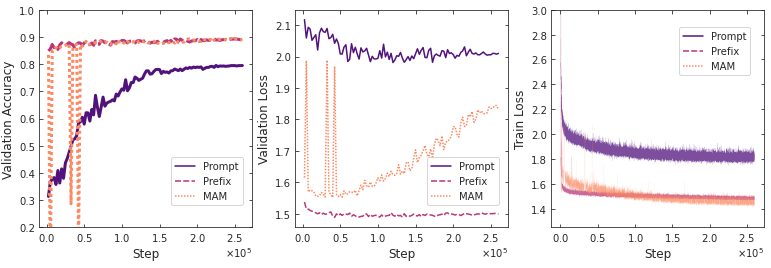

In [7]:
# Generate Plots
# Save 
fname = "Source_Tuning_Detail"

with sns.axes_style("white", style_dict):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(13,4))
    
    # Plot Validation Accuracy
    p1 = sns.lineplot(
        data = st_vacc, x = 'Step', y = 'Val Acc', hue = 'Model', palette = 'magma',
        alpha = 1, linewidth = 3, style = 'Model', ax=axes[0]
    )
    
    #Plot Validation Loss
    p2 = sns.lineplot(
        data = st_vloss, x = 'Step', y = 'Val Loss', hue = 'Model', palette = 'magma',
        style = 'Model', ax=axes[1]
    )
    
    #Plot Train Loss
    p3 = sns.lineplot(
        data = st_tloss, x = 'Step', y = 'Train Loss', hue = 'Model', palette = 'magma',
        alpha = 0.75, linewidth = 0.1, style = 'Model'
    )
    
    # Set some specific legelnd and scale parameters
    axes[0].set_ylim(0.2, 1)
    axes[0].legend(loc= [0.62,0.1])

    axes[1].legend(loc= [0.62,0.1])
    
    axes[2].set_ylim(1.25, 3)
    axes[2].legend(loc= [0.6, 0.7])
    
    #Adjust Label size
    ylabel = ["Validation Accuracy", "Validation Loss", "Train Loss"]
    i=0
    for p in [p1, p2, p3]:
        p.set_xlabel("Step", fontsize = 12)
        p.set_ylabel(ylabel[i], fontsize = 12)
        p.ticklabel_format(axis='x', style='sci', scilimits=(3,4), useMathText=True) 
        i+=1
        
    
    #save
    plt.savefig(f"{fname}.png", format = 'png')

# Plots of Prompt Tuning

In [8]:
df_PromptExploration.keys()

Index(['train/global_step', 'Prompt_MNLI_run13 - _step',
       'Prompt_MNLI_run13 - _step__MIN', 'Prompt_MNLI_run13 - _step__MAX',
       'Prompt_MNLI_run13 - eval/accuracy',
       'Prompt_MNLI_run13 - eval/accuracy__MIN',
       'Prompt_MNLI_run13 - eval/accuracy__MAX',
       'Prompt_MNLI_run13 - eval/loss', 'Prompt_MNLI_run13 - eval/loss__MIN',
       'Prompt_MNLI_run13 - eval/loss__MAX', 'Prompt_MNLI_run13 - train/loss',
       'Prompt_MNLI_run13 - train/loss__MIN',
       'Prompt_MNLI_run13 - train/loss__MAX', 'Prompt_MNLI_run14 - _step',
       'Prompt_MNLI_run14 - _step__MIN', 'Prompt_MNLI_run14 - _step__MAX',
       'Prompt_MNLI_run14 - eval/accuracy',
       'Prompt_MNLI_run14 - eval/accuracy__MIN',
       'Prompt_MNLI_run14 - eval/accuracy__MAX',
       'Prompt_MNLI_run14 - eval/loss', 'Prompt_MNLI_run14 - eval/loss__MIN',
       'Prompt_MNLI_run14 - eval/loss__MAX', 'Prompt_MNLI_run14 - train/loss',
       'Prompt_MNLI_run14 - train/loss__MIN',
       'Prompt_MNLI_run14 - 

In [9]:
# Split the main dataframe into sub dataframes taking the columns we need. 

pt_vloss = df_PromptExploration[
    [
        'train/global_step',
        'Prompt_MNLI_run14 - eval/loss',
        'Prompt_MNLI_run13 - eval/loss',
        'Prompt_MNLI_run12 - eval/loss',
        'Prompt_MNLI_run5 - eval/loss',
        'Prompt_MNLI_run10 - eval/loss'
    ]
]

pt_tloss = df_PromptExploration[
    [
        'train/global_step',
        'Prompt_MNLI_run14 - train/loss',
        'Prompt_MNLI_run13 - train/loss',
        'Prompt_MNLI_run12 - train/loss',
        'Prompt_MNLI_run5 - train/loss',
        'Prompt_MNLI_run10 - train/loss'
    ]
]

pt_vacc = df_PromptExploration[
    [
        'train/global_step',
        'Prompt_MNLI_run14 - eval/accuracy',
        'Prompt_MNLI_run13 - eval/accuracy',
        'Prompt_MNLI_run12 - eval/accuracy',
        'Prompt_MNLI_run5 - eval/accuracy',
        'Prompt_MNLI_run10 - eval/accuracy'
    ]
]

In [10]:
# Clean up the columns and set up the data frames.
df_list = [pt_vloss, pt_tloss, pt_vacc]

for df in df_list:
    
    # Prepare df for plotting
    df.columns =['Step', '10', '50', '110', '200', '400']
    df.dropna(axis=0, inplace = True) 
    df.set_index('Step', inplace = True)
    
#Stack series for plot
pt_vloss = pt_vloss.stack().reset_index()
pt_tloss = pt_tloss.stack().reset_index()
pt_vacc = pt_vacc.stack().reset_index()

# Rename Columns
pt_vloss.columns = ["Step", "Prompt_Length", "Val Loss"]
pt_tloss.columns = ["Step", "Prompt_Length", "Train Loss"]
pt_vacc.columns = ["Step", "Prompt_Length", "Val Acc"]

<ipython-input-10-ae57bf8475d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace = True)
<ipython-input-10-ae57bf8475d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace = True)
<ipython-input-10-ae57bf8475d3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace = True)


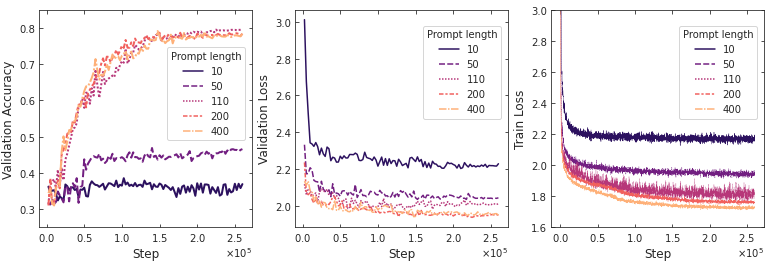

In [16]:
# Generate Plots
# Save 
fname = "Prompt_Tuning_Variation"

with sns.axes_style("white", style_dict):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(13,4))
    
    # Plot Validation Accuracy
    p1 = sns.lineplot(
        data = pt_vacc, x = 'Step', y = 'Val Acc', hue = 'Prompt_Length', palette = 'magma',
        alpha = 1, linewidth = 2, style = 'Prompt_Length', ax=axes[0]
    )
    
    #Plot Validation Loss
    p2 = sns.lineplot(
        data = pt_vloss, x = 'Step', y = 'Val Loss', hue = 'Prompt_Length', palette = 'magma',
        style = 'Prompt_Length', ax=axes[1]
    )
    
    #Plot Train Loss
    p3 = sns.lineplot(
        data = pt_tloss, x = 'Step', y = 'Train Loss', hue = 'Prompt_Length', palette = 'magma',
        alpha = 1, linewidth = 0.4, style = 'Prompt_Length'
    )
    
    # Set some specific legelnd and scale parameters
    axes[0].set_ylim(0.25, 0.85)
    axes[0].legend(loc= [0.6,0.4], title='Prompt length')

    axes[1].legend(loc= [0.6,0.5], title='Prompt length')
    
    axes[2].set_ylim(1.6, 3)
    axes[2].legend(loc= [0.6, 0.5], title='Prompt length')
    
    #Adjust Label size
    ylabel = ["Validation Accuracy", "Validation Loss", "Train Loss"]
    i=0
    for p in [p1, p2, p3]:
        p.set_xlabel("Step", fontsize = 12)
        p.set_ylabel(ylabel[i], fontsize = 12)
        p.ticklabel_format(axis='x', style='sci', scilimits=(3,4), useMathText=True) 
        i+=1
        
    
    #save
    plt.savefig(f"{fname}.png", format = 'png')